<a href="https://colab.research.google.com/github/Slrosales/Optimizacion_Teamwork/blob/main/TeamWork_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* María Gómez
* Laura Gómez
* Camilo Heras
* Valeria Jiménez
* Brayan Gutiérrez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
dfClientes = pd.read_csv('ClientesBanco.csv')

In [ ]:
dfClientes.columns

Index(['nombre', 'edad', 'saldo_promedio', 'tasa_interes', 'ingreso_mensual',
       'aprobacion_prestamo'],
      dtype='object')

In [ ]:
# ['edad', 'saldo_promedio', 'tasa_interes', 'ingreso_mensual']
inputs = ['saldo_promedio', 'tasa_interes', 'ingreso_mensual']
output = ['aprobacion_prestamo']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
scores_lg = []
parms_ = []
for k in range(1000):
  dfTrain, dfTest = train_test_split(dfClientes, test_size=.3, random_state=k+1)
  logit = LogisticRegression(fit_intercept=False)
  logit.fit(dfTrain[inputs], dfTrain[output])
  scores_lg.append(logit.score(dfTest[inputs], dfTest[output]))
  parms_.append(logit.coef_[0])


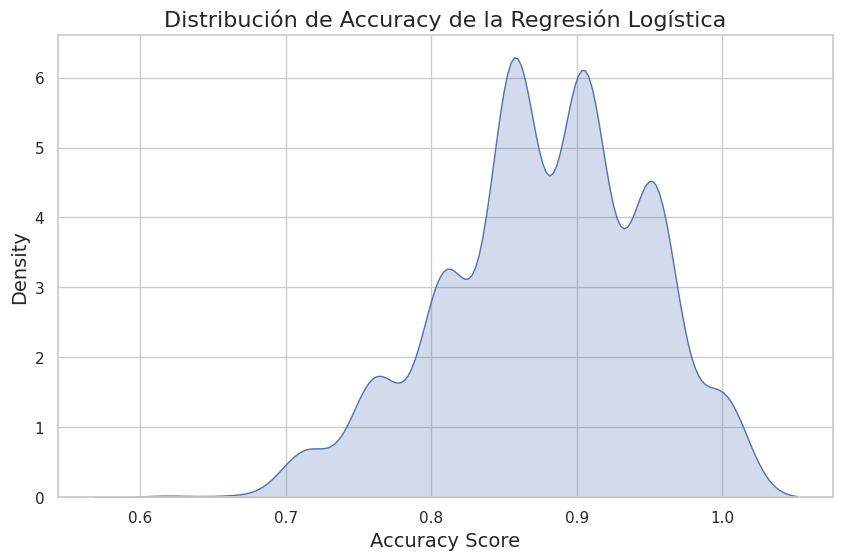

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(scores_lg, fill=True)

ax.set_title('Distribución de Accuracy de la Regresión Logística', fontsize=16)
ax.set_xlabel('Accuracy Score', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

plt.show()


In [ ]:
logit.predict(dfTest[inputs])

array(['Aprobado', 'Aprobado', 'Rechazado', 'Aprobado', 'Aprobado',
       'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado',
       'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado',
       'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado', 'Aprobado',
       'Aprobado'], dtype=object)

In [ ]:
logit.predict_proba(dfTest[inputs])

array([[7.29275139e-01, 2.70724861e-01],
       [9.99977239e-01, 2.27611020e-05],
       [1.62476128e-01, 8.37523872e-01],
       [8.80999587e-01, 1.19000413e-01],
       [9.99999764e-01, 2.35910946e-07],
       [9.54394416e-01, 4.56055836e-02],
       [9.05875735e-01, 9.41242646e-02],
       [9.99973069e-01, 2.69309148e-05],
       [9.99991721e-01, 8.27896121e-06],
       [8.97571159e-01, 1.02428841e-01],
       [5.06665373e-01, 4.93334627e-01],
       [8.75996152e-01, 1.24003848e-01],
       [9.82110955e-01, 1.78890450e-02],
       [9.21998928e-01, 7.80010723e-02],
       [8.22542796e-01, 1.77457204e-01],
       [9.99945635e-01, 5.43654120e-05],
       [9.67621584e-01, 3.23784159e-02],
       [9.99944073e-01, 5.59268755e-05],
       [9.53154066e-01, 4.68459341e-02],
       [9.98345078e-01, 1.65492235e-03],
       [9.99935663e-01, 6.43365643e-05]])

## Metricas Regresión logistica303030.svg

In [ ]:
predicciones_lg = logit.predict(dfTest[inputs]).flatten()
valorsreales_lg = dfTest[output].values.flatten()

mean_lg = np.mean(scores_lg)
recall_lg = recall_score(valorsreales_lg, predicciones_lg,  pos_label="Aprobado")
f1_lg = f1_score(valorsreales_lg, predicciones_lg,  pos_label="Aprobado") #combinacion de precision y recall pa tener un valor mas completo de cada uno
precisión_lg = precision_score(valorsreales_lg, predicciones_lg, average="binary", pos_label="Aprobado") #el pos_label es el caso positivo q pongo q es 1 al binarizar, por lo general lo defino yo
acc_lg = accuracy_score(valorsreales_lg, predicciones_lg,) #mide la proporción de predicciones correctas que realiza el modelo sobre el total de predicciones realizadas
# evaluar el rendimiento de un modelo de clasificación

# Redes Neuronales 1

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
scores_n1 = []
parms_ = []
for k in range(1000):
  mlp_n1 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), activation='identity', alpha=0.5) #modelo de clasificación
  mlp_n1.fit(dfTrain[inputs], dfTrain[output])
  scores_n1.append(mlp_n1.score(dfTest[inputs], dfTest[output])) #compara la verdadera salida con la relacion entre la entrada y la salida

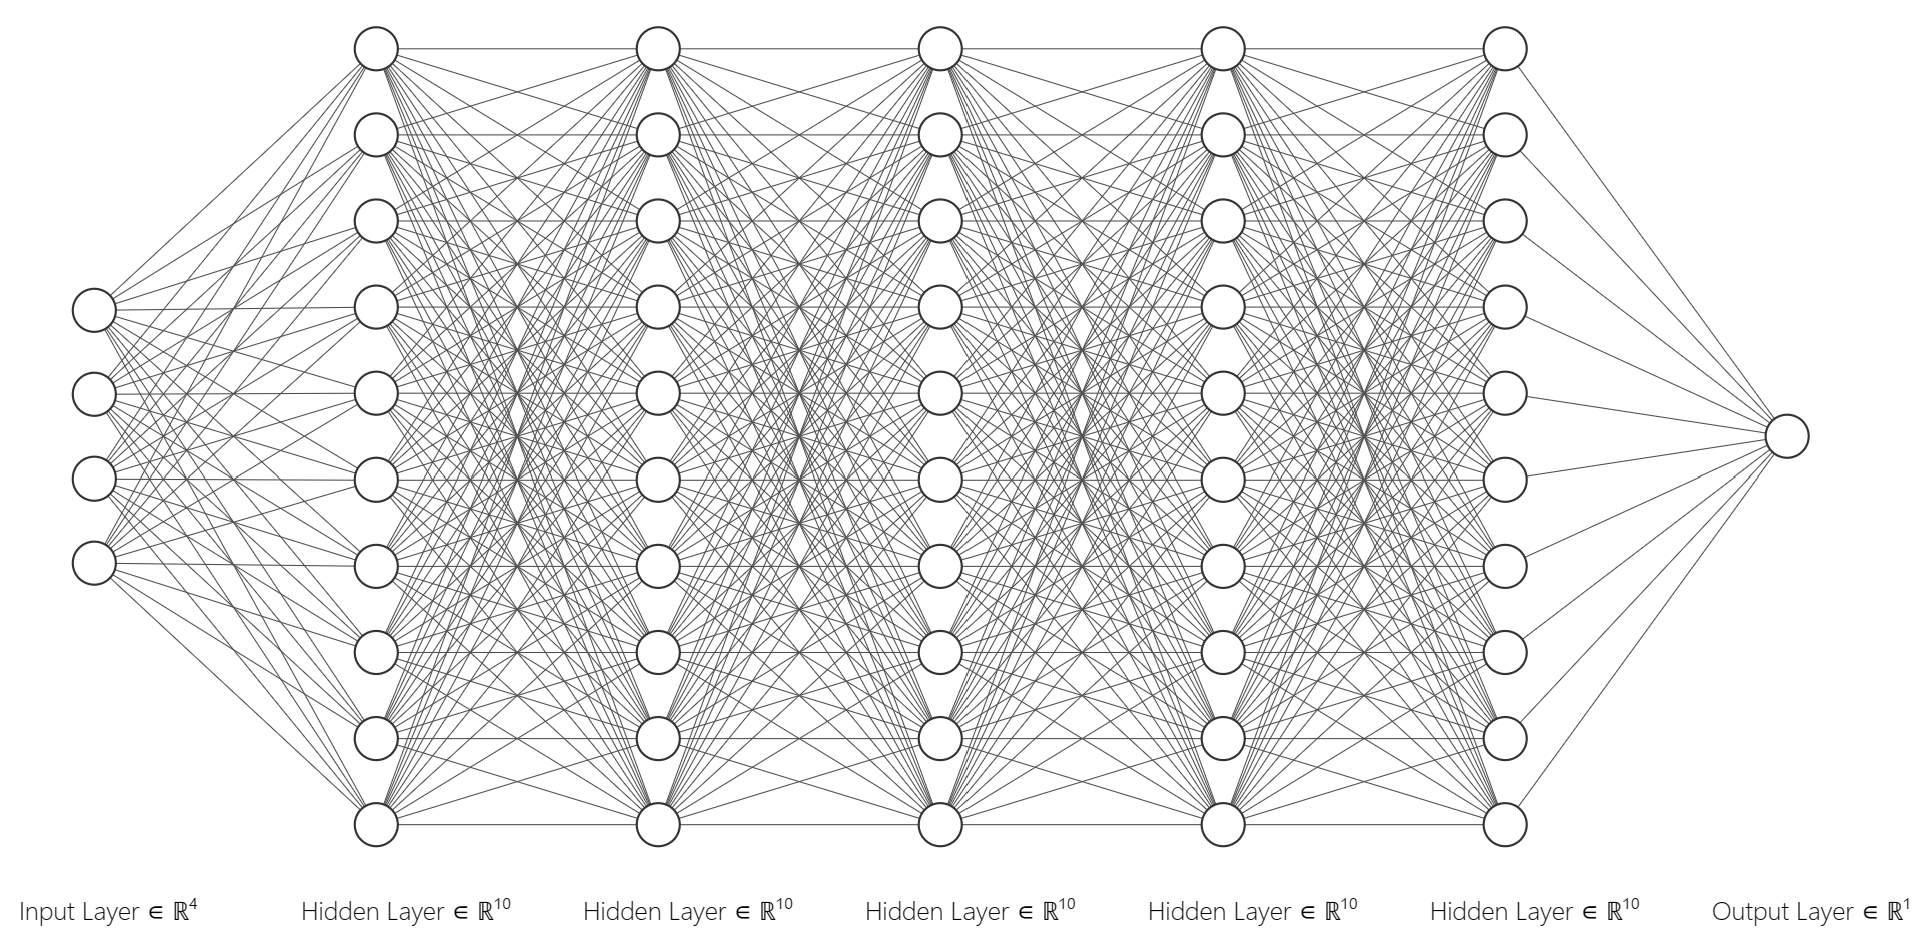

## Metricas Redes Neuronales 1

In [ ]:
mlp_n1.predict_proba(dfTest[inputs])

array([[9.99999999e-01, 1.21572048e-09],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.02974006e-14],
       [9.99999992e-01, 8.03194178e-09],
       [0.00000000e+00, 1.00000000e+00],
       [9.98226189e-01, 1.77381104e-03],
       [9.93925448e-01, 6.07455159e-03],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99711635e-01, 2.88365420e-04],
       [1.00000000e+00, 9.31390471e-12],
       [9.99999998e-01, 1.74491616e-09],
       [4.52628975e-02, 9.54737102e-01],
       [1.00000000e+00, 5.51410342e-12],
       [9.99999999e-01, 1.41463363e-09],
       [0.00000000e+00, 1.00000000e+00],
       [3.83820783e-07, 9.99999616e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999947e-01, 5.30649006e-08],
       [4.90092299e-07, 9.99999510e-01],
       [0.00000000e+00, 1.00000000e+00]])

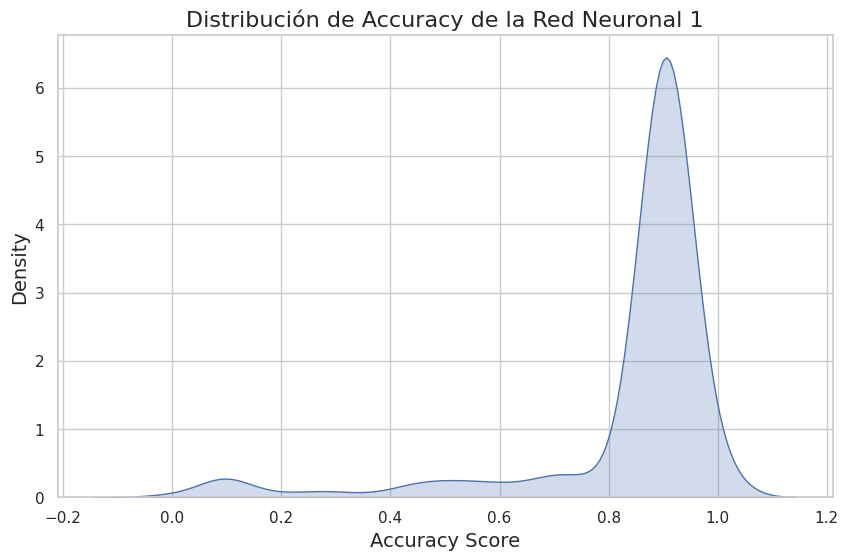

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(scores_n1, fill=True)

ax.set_title('Distribución de Accuracy de la Red Neuronal 1', fontsize=16)
ax.set_xlabel('Accuracy Score', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

plt.show()

In [ ]:
predicciones_n1 = mlp_n1.predict(dfTest[inputs]).flatten()
valorsreales_n1 = dfTest[output].values.flatten()

mean_n1 = np.mean(scores_n1)
recall_n1 = recall_score(valorsreales_n1, predicciones_n1,  pos_label="Aprobado")
f1_n1 = f1_score(valorsreales_n1, predicciones_n1,  pos_label="Aprobado") #combinacion de precision y recall pa tener un valor mas completo de cada uno
precisión_n1 = precision_score(valorsreales_n1, predicciones_n1, average="binary", pos_label="Aprobado") #el pos_label es el caso positivo q pongo q es 1 al binarizar, por lo general lo defino yo
acc_n1 = accuracy_score(valorsreales_n1, predicciones_n1,)

In [ ]:
print(mean_n1)

0.8365238095238097


# Redes Neuronales 2

In [ ]:
scores_n2 = []
parms_ = []
for k in range(1000):
  mlp_n2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='identity', alpha=0.5) #modelo de clasificación
  mlp_n2.fit(dfTrain[inputs], dfTrain[output])
  scores_n2.append(mlp_n2.score(dfTest[inputs], dfTest[output])) #compara la verdadera salida con la relacion entre la entrada y la salida

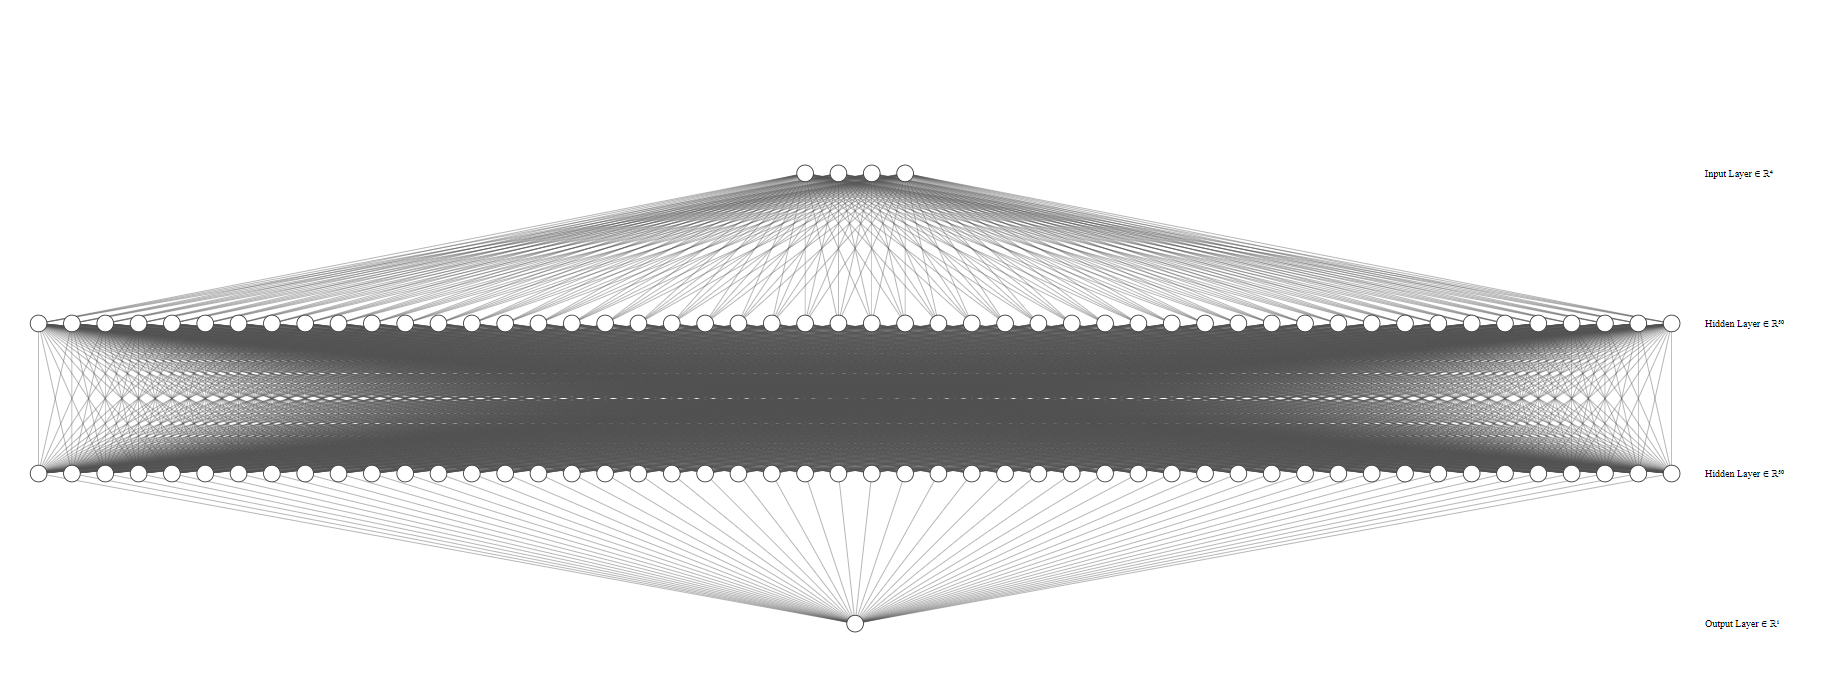

## Metricas Redes Neuronales 2

In [ ]:
mlp_n2.predict_proba(dfTest[inputs])

array([[0.63028646, 0.36971354],
       [0.99564142, 0.00435858],
       [0.57754281, 0.42245719],
       [0.76711075, 0.23288925],
       [0.99564139, 0.00435861],
       [0.98564468, 0.01435532],
       [0.98474592, 0.01525408],
       [0.99564142, 0.00435858],
       [0.99564142, 0.00435858],
       [0.97741132, 0.02258868],
       [0.58211423, 0.41788577],
       [0.74094903, 0.25905097],
       [0.99526133, 0.00473867],
       [0.64829359, 0.35170641],
       [0.74079617, 0.25920383],
       [0.99564142, 0.00435858],
       [0.99526257, 0.00473743],
       [0.99526266, 0.00473734],
       [0.87094804, 0.12905196],
       [0.99526263, 0.00473737],
       [0.99564143, 0.00435857]])

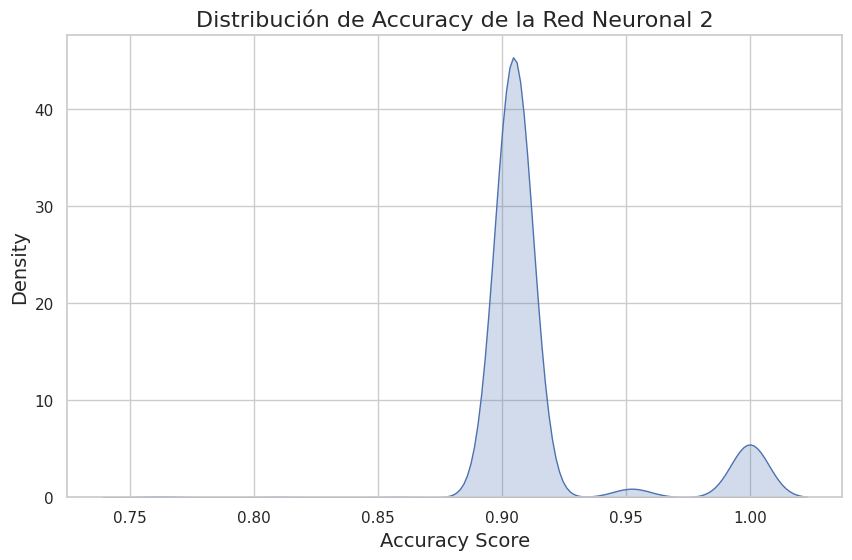

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(scores_n2, fill=True)

ax.set_title('Distribución de Accuracy de la Red Neuronal 2', fontsize=16)
ax.set_xlabel('Accuracy Score', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

plt.show()

In [ ]:
predicciones_n2 = mlp_n2.predict(dfTest[inputs]).flatten()
valorsreales_n2 = dfTest[output].values.flatten()

mean_n2 = np.mean(scores_n2)
recall_n2 = recall_score(valorsreales_n2, predicciones_n2,  pos_label="Aprobado")
f1_n2 = f1_score(valorsreales_n2, predicciones_n2,  pos_label="Aprobado") #combinacion de precision y recall pa tener un valor mas completo de cada uno
precisión_n2 = precision_score(valorsreales_n2, predicciones_n2, average="binary", pos_label="Aprobado") #el pos_label es el caso positivo q pongo q es 1 al binarizar, por lo general lo defino yo
acc_n2 = accuracy_score(valorsreales_n2, predicciones_n2,)

In [ ]:
print(mean_n2)

0.9151428571428574


# Redes Neuronales 3

In [ ]:
scores_n3 = []
parms_ = []
for k in range(1000):
  mlp_n3 = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='identity', alpha=0.5) #modelo de clasificación
  mlp_n3.fit(dfTrain[inputs], dfTrain[output])
  scores_n3.append(mlp_n3.score(dfTest[inputs], dfTest[output])) #compara la verdadera salida con la relacion entre la entrada y la salida

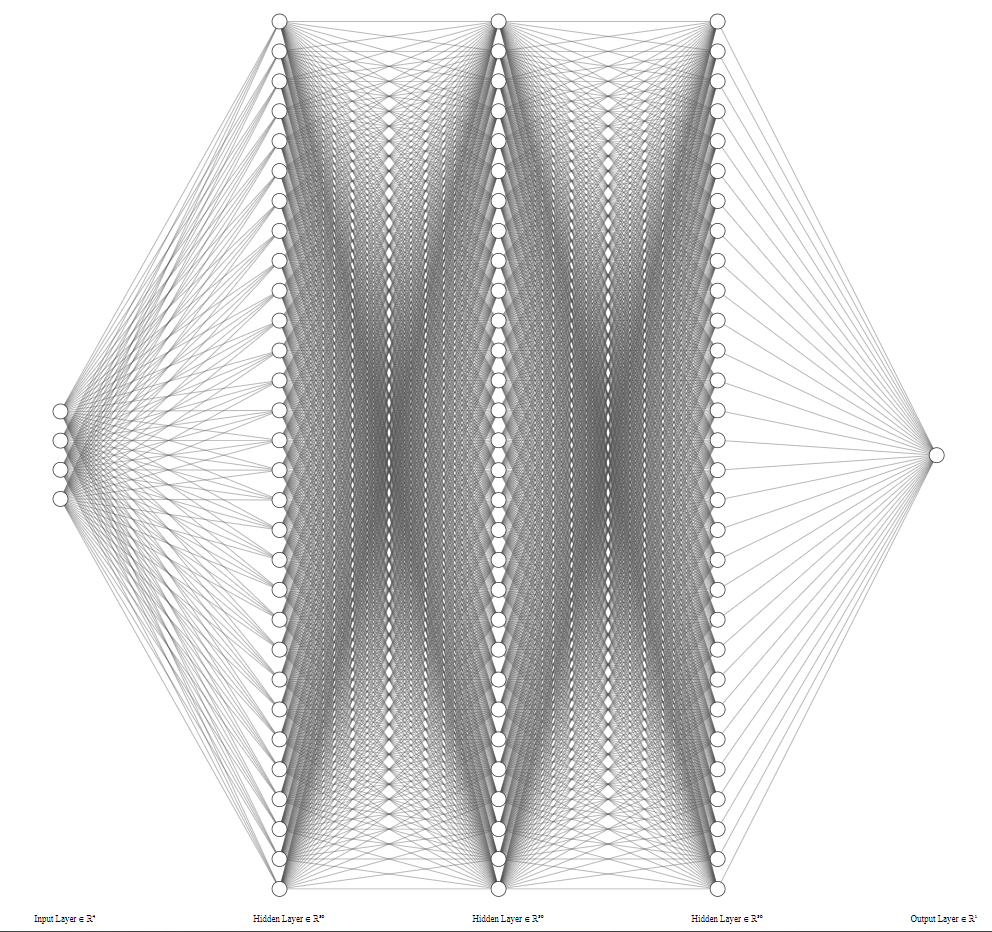

## Metricas Redes Neuronales 3

In [ ]:
mlp_n3.predict_proba(dfTest[inputs])

array([[1.00000000e+000, 3.54502859e-021],
       [1.00000000e+000, 5.86895932e-079],
       [1.00000000e+000, 2.38190129e-010],
       [1.00000000e+000, 1.42057719e-027],
       [1.00000000e+000, 2.31046164e-103],
       [1.00000000e+000, 2.38500628e-037],
       [1.00000000e+000, 5.76363452e-030],
       [1.00000000e+000, 1.36498147e-072],
       [1.00000000e+000, 2.26492194e-082],
       [1.00000000e+000, 5.88228719e-031],
       [1.00000000e+000, 8.92331511e-016],
       [1.00000000e+000, 4.53826374e-028],
       [1.00000000e+000, 2.94040099e-041],
       [1.00000000e+000, 4.45757101e-030],
       [1.00000000e+000, 4.70093618e-028],
       [1.00000000e+000, 4.66438376e-074],
       [1.00000000e+000, 2.94235356e-037],
       [1.00000000e+000, 3.58749376e-072],
       [1.00000000e+000, 5.69259032e-034],
       [1.00000000e+000, 1.40240698e-051],
       [1.00000000e+000, 3.49571814e-069]])

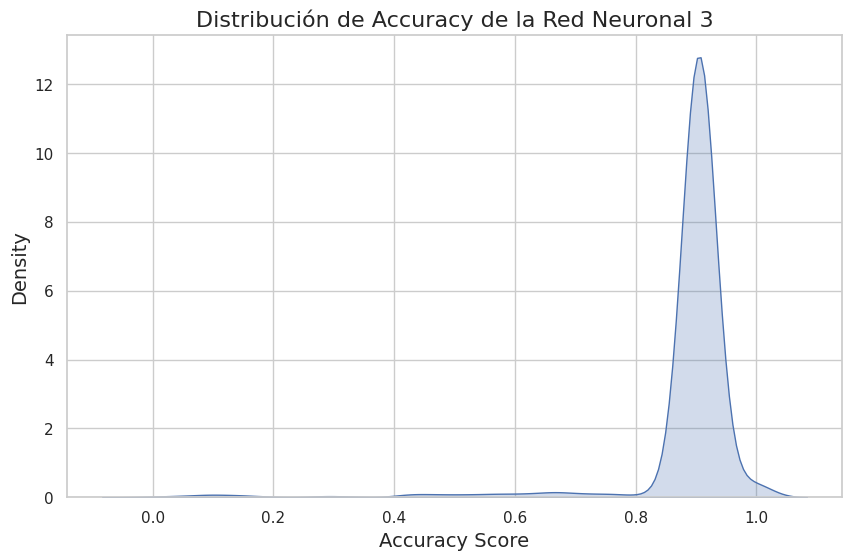

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(scores_n3, fill=True)

ax.set_title('Distribución de Accuracy de la Red Neuronal 3', fontsize=16)
ax.set_xlabel('Accuracy Score', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

plt.show()

In [ ]:
predicciones_n3 = mlp_n3.predict(dfTest[inputs]).flatten()
valorsreales_n3 = dfTest[output].values.flatten()

mean_n3 = np.mean(scores_n3)
recall_n3 = recall_score(valorsreales_n3, predicciones_n3,  pos_label="Aprobado")
f1_n3 = f1_score(valorsreales_n3, predicciones_n3,  pos_label="Aprobado") #combinacion de precision y recall pa tener un valor mas completo de cada uno
precisión_n3 = precision_score(valorsreales_n3, predicciones_n3, average="binary", pos_label="Aprobado") #el pos_label es el caso positivo q pongo q es 1 al binarizar, por lo general lo defino yo
acc_n3 = accuracy_score(valorsreales_n3, predicciones_n3,)

In [ ]:
print(mean_n3)

0.8841428571428573


# Conclusiones

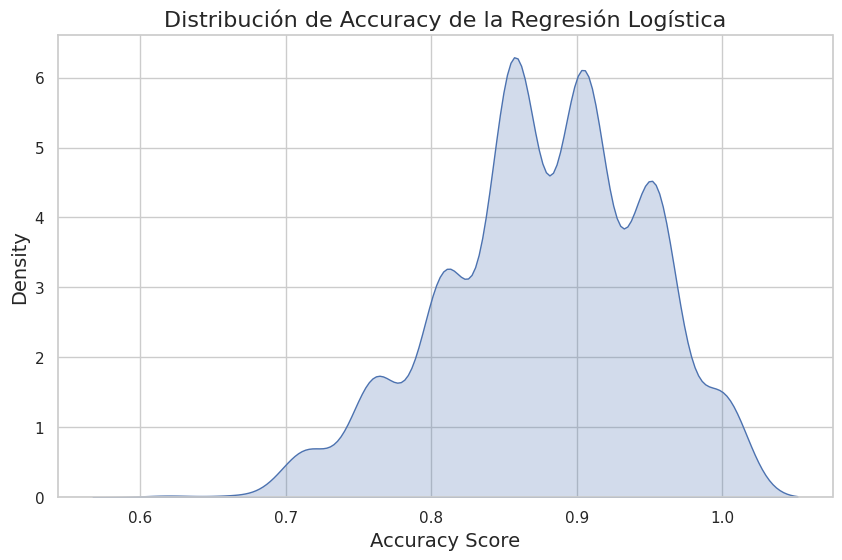

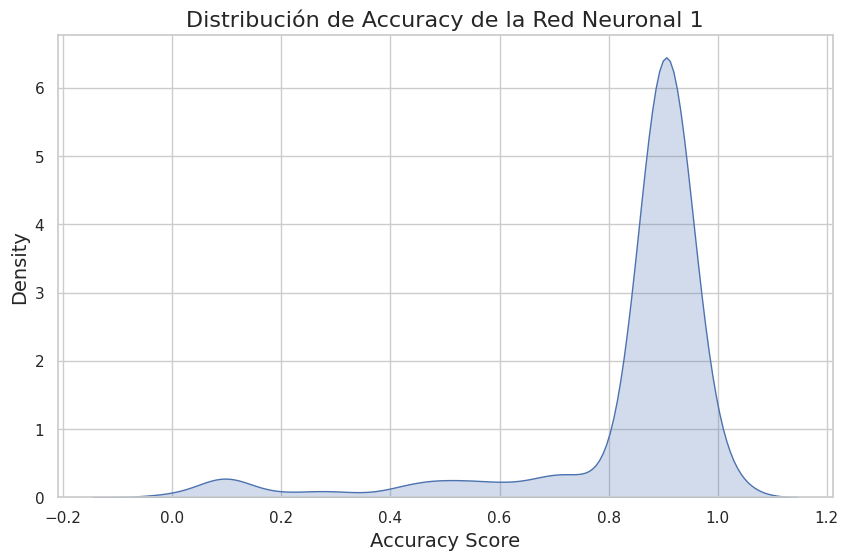

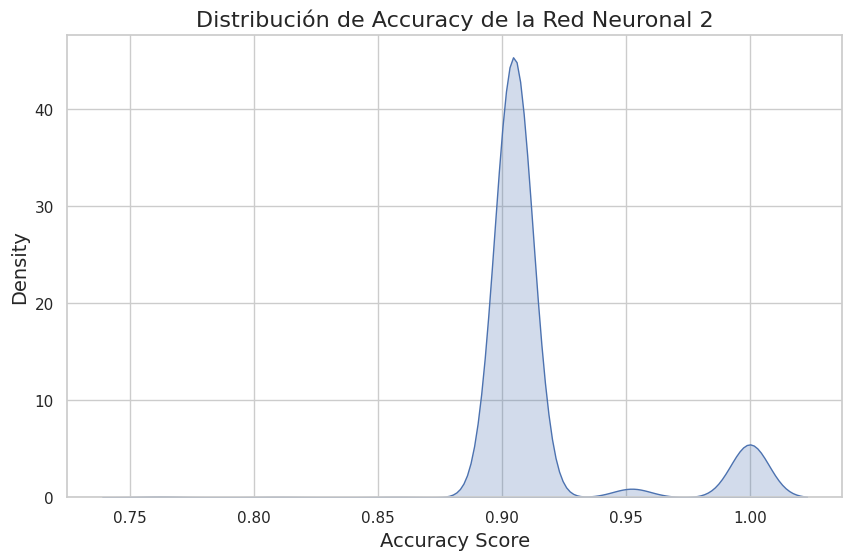

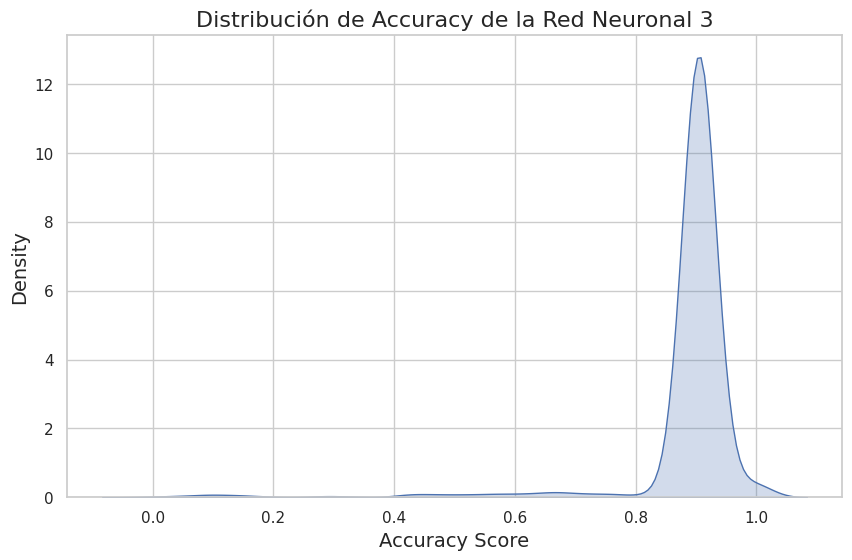

| Modelo | Precisión (Precision) | Recall | F1-Score | Accuracy (Acc) |Mean|
| ------ | --------------------- | ------ | -------- | -------------- |----|
| lg     | 0.95                  | 1.0    | 0.9743   | 0.9523         |0.8783|
| n1     | 0.4736                | 0.8652 | 0.6      | 0.4285         |0.8365
| n2     | 0.9500                | 1.0000 | 0.9500   | 0.9047         |0.9151|
| n3     | 0.9500                | 1.0000 | 0.9500   | 0.9047         |0.8841|


| Modelo | Configuración de Capas        | Función de Activación | Alpha |
| ------ | ----------------------------- | --------------------- | ----- |
| n1     | 5 capas ocultas (10 neuronas cada una) | identity              | 0.5   |
| n2     | 2 capas ocultas (50 neuronas cada una) | identity              | 0.5   |
| n3     | 3 capas ocultas (30 neuronas cada una) | identity              | 0.5   |


**Conclusiones:**

Las variables de entrada escogidas fueron: 'saldo_promedio' 'tasa_interes' 'ingreso_mensual', debido a su relevancia para determinar y predecir la aprobación del préstamo.

*   Si nos referimos a la Precisión podemos llegar a la conclusión que la red neuronal 1 fue la que obtuvo un peor puntaje, es decir, este modelo mide la peor proporción de instancias positivas que fueron
correctamente identificadas por el modelo entre todas las instancias que el modelo predijo como positivas, por ende, se descartaría.
*   En el recall vemos lo mismo que en Precisión, en otras palabras, descartaríamos la red neuronal 1, ya que su valor en comparación a las demás es baja, lo cual nos dice que la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias que son realmente positivas en los datos de prueba fue menor en comparación a los otros modelos.
*   En cuanto a F1-Score, la regresión logística tuvo un mayor puntaje, lo que sugiere un buen equilibrio entre la precisión y el recall.
*   Con el Accuracy se puede observar que el mejor modelo fue el de Regresión Logística, de otra manera, este está midiendo de manera acertada la proporción de predicciones correctas que realiza el modelo sobre el total de predicciones realizadas.
*   Por último, en la métrica mean el modelo neuronal 2 obtuvo el mayor puntaje promedio, lo que nos dice que esta arquitectura es adecuada para el conjunto de datos en cuestión. Además, entre el modelo n2 y n3 este último obtuvo un menor puntaje entre estos dos, lo cual quedaría descartado, ya que el resto de métricas tienen el mismo valor.

Ahora, nos quedaría la red neuronal 2 y el modelo de regresión logística.

La red neuronal 2 parece tener una variabilidad razonable en sus predicciones, dada su calibración. La regresión logística, aunque también es un buen modelo, presenta mayor variabilidad en su desempeño, lo que podría ser un riesgo dependiendo de la variabilidad de los datos.

Sin embargo, en caso de que no se tengan los suficientes recursos computacionales para procesar los datos con la red neuronal 2, es recomendable usar regresión logística.


